In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Dataset structure

In [10]:
startpath = 'idd20k_lite/'
for root, dirs, files in os.walk(startpath):
    level = root.replace(startpath, '').count(os.sep)
    indent = ' ' * 4 * (level)
    try:
        if not os.path.basename(root)[0].isdigit():
            print('{}{}/'.format(indent, os.path.basename(root)))
    except:
        pass
    subindent = ' ' * 4 * (level + 1)
    

gtFine/
    train/
    val/
leftImg8bit/
    test/
    train/
    val/


## Sample training image

In [46]:
img = cv2.imread('idd20k_lite/leftImg8bit/train/0/024541_image.jpg')

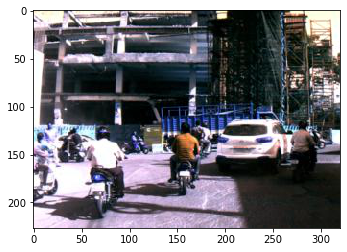

In [47]:
plt.imshow(img)

## Semantic Segment map

In [48]:
smap = cv2.imread('idd20k_lite/gtFine/train/0/024541_label.png',0)

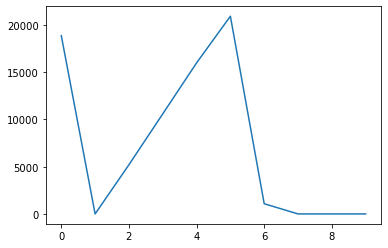

In [49]:
histr = cv2.calcHist([smap],[0],None,[10],[0,10]) 
plt.plot(histr)

In [50]:
#frequency distribution
y = np.bincount(smap.flatten())
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T 

array([[    0, 18864],
       [    2,  5202],
       [    3, 10586],
       [    4, 15982],
       [    5, 20919],
       [    6,  1077],
       [  255,    10]])

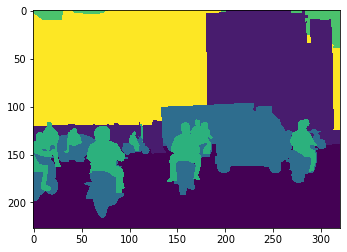

In [58]:
n = 250//(len(np.vstack((ii,y[ii])).T)-2)
for i in range(len(smap)):
    for j in range(len(smap[0])):
        if smap[i][j]!=0 or smap[i][j]!=255:
            smap[i][j]*=n
plt.imshow(smap)

## Instance segment map

In [52]:
imap = cv2.imread('idd20k_lite/gtFine/train/0/024541_inst_label.png',0)

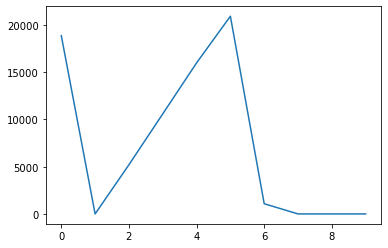

In [53]:
ihistr = cv2.calcHist([imap],[0],None,[10],[0,10]) 
plt.plot(ihistr)

In [54]:
y = np.bincount(imap.flatten())
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T 

array([[    0, 18864],
       [    2,  5202],
       [    3, 10586],
       [    4, 15982],
       [    5, 20919],
       [    6,  1077],
       [  255,    10]])

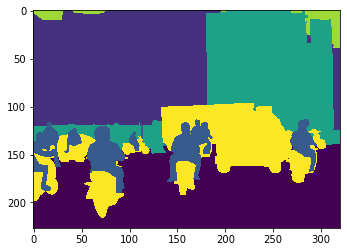

In [57]:
n = 250//(len(np.vstack((ii,y[ii])).T)-2)
for i in range(len(imap)):
    for j in range(len(imap[0])):
        if imap[i][j]!=0 or imap[i][j]!=255:
            imap[i][j]*=n
plt.imshow(imap)